In [1]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn :: utils
from sklearn.model_selection import train_test_split

# sklearn :: models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# sklearn :: evaluation metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

sns.set_style('whitegrid')

# Problem definition

Apply regression models to predict the house pricing

# Load the data

In [2]:
#input
df_pricing = pd.read_csv('data/house_pricing.csv')
print(df_pricing.columns)
df_pricing.head()

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'walking_score',
       'transit_score', 'bike_score', 'median_income', 'mean_income',
       'population'],
      dtype='object')


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,walking_score,transit_score,bike_score,median_income,mean_income,population
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,47.5112,-122.257,1340,5650,24,46.0,22.0,55777.0,65498.0,24092
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,47.7210,-122.319,1690,7639,67,59.0,64.0,47910.0,60487.0,30826
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,47.7379,-122.233,2720,8062,14,36.0,NaN,86310.0,100546.0,20419
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,47.5208,-122.393,1360,5000,74,48.0,51.0,77761.0,95355.0,14770
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,47.6168,-122.045,1800,7503,9,0.0,NaN,134159.0,157543.0,25748


# Feature Engineering 

In [3]:
# zipcode to numerical columns
df_zipcode = pd.get_dummies(df_pricing['zipcode'])
df = pd.concat([df_pricing, df_zipcode], axis=1).fillna(0.0)
print(list(df.columns))
df.head()

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'walking_score', 'transit_score', 'bike_score', 'median_income', 'mean_income', 'population', 98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010, 98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029, 98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042, 98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070, 98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119, 98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155, 98166, 98168, 98177, 98178, 98188, 98198, 98199]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# select the columns
X_columns = ['bedrooms', 'bathrooms', 'grade', 'condition', 'waterfront', 'sqft_living15', 'sqft_lot15'] + list(df_zipcode.columns)
y_column = ['price']

# Model Training

In [5]:
# split the data

df = df.sample(frac=1).reset_index(drop=True)

threshold = 0.8
absolute_threshold = int(len(df)*threshold)

X_train = df.iloc[:absolute_threshold][X_columns]
y_train = df.iloc[:absolute_threshold][y_column]

X_test = df.iloc[absolute_threshold:][X_columns]
y_test = df.iloc[absolute_threshold:][y_column]

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (16932, 77)
y_train (16932, 1)
X_test (4233, 77)
y_test (4233, 1)


In [6]:
# TODO: split the data using sklearn train_test_split
threshold = 0.8
X = df[X_columns]
y = df[y_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold, shuffle=True)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)


X_train (16932, 77)
y_train (16932, 1)
X_test (4233, 77)
y_test (4233, 1)


In [7]:
# TODO: train a linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model Evaluation

MAE 92086.97


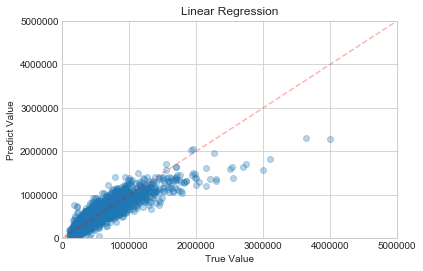

In [8]:
mae = mean_absolute_error(y_test, y_pred)
print('MAE', round(mae, 2))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot(range(0,5000000, 100), range(0,5000000, 100), '--r', alpha=0.3, label='Line1')
plt.title('Linear Regression')
plt.xlabel('True Value')
plt.ylabel('Predict Value')
plt.xlim([0, 5000000])
plt.ylim([0, 5000000])
plt.show()

In [9]:
# TODO: calculate the RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

140654.78409437835

# KNN

In [10]:
# TODO: train a knn model
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_absolute_error(y_test, y_pred)

160229.26503661706

# Decision Tree

In [11]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_absolute_error(y_test, y_pred)

105749.66150090558

# Experiments

Linear Regression
MAE 92086.96811822196
RMSE 140654.78409437835


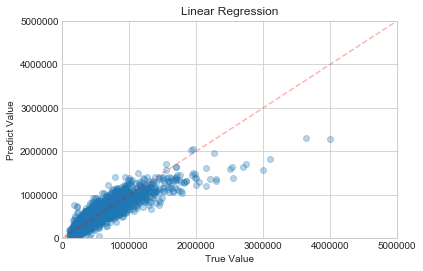


KNN 5
MAE 167374.3916843846
RMSE 252776.14436391564


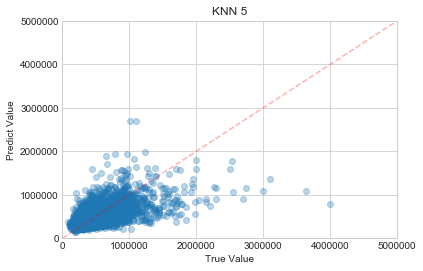


KNN 2
MAE 184396.08953460903
RMSE 280124.4116817375


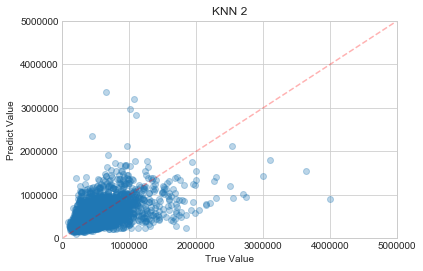


Decision Tree
MAE 105091.512670289
RMSE 163045.83160072623


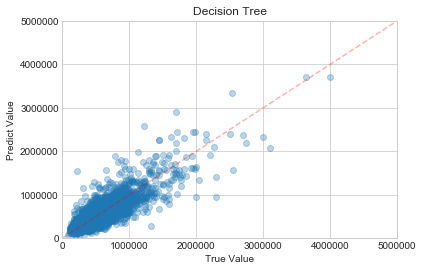

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest 10
MAE 84531.88770675605
RMSE 133890.28006308764


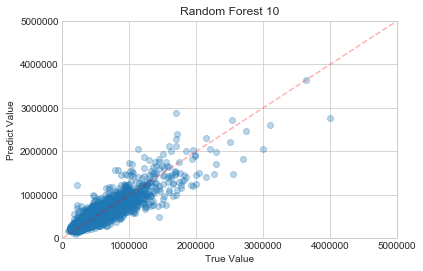

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest 100
MAE 80598.70587010431
RMSE 126693.42080051223


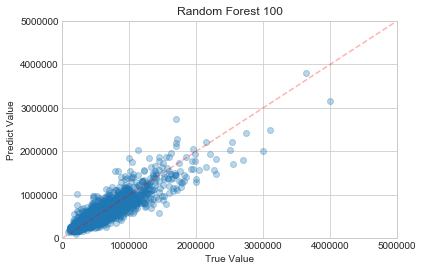

In [12]:
def model_training(model_name, model, X_train, y_train):
    model.fit(X_train, y_train)
    return model
    
def model_prediction(model, X_test):
    y_pred = model.predict(X_test)
    return y_pred

def model_evaluation(model_name, y_test, y_pred):
    print(model_name)
    print('MAE', mean_absolute_error(y_test, y_pred))
    print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot(range(0,5000000, 100), range(0,5000000, 100), '--r', alpha=0.3, label='Line1')
    plt.title(model_name)
    plt.xlabel('True Value')
    plt.ylabel('Predict Value')
    plt.xlim([0, 5000000])
    plt.ylim([0, 5000000])
    plt.show()
    print('')

def run_experiment(model_name, model, X_train, y_train, X_test):
    train_model = model_training(model_name, model, X_train, y_train)
    predictions = model_prediction(train_model, X_test)
    model_evaluation(model_name, y_test, predictions)
    
run_experiment('Linear Regression', LinearRegression(), X_train, y_train, X_test)
run_experiment('KNN 5', KNeighborsRegressor(5), X_train, y_train, X_test)
run_experiment('KNN 2', KNeighborsRegressor(2), X_train, y_train, X_test)
run_experiment('Decision Tree', DecisionTreeRegressor(), X_train, y_train, X_test)
run_experiment('Random Forest 10', RandomForestRegressor(10), X_train, y_train, X_test)
run_experiment('Random Forest 100', RandomForestRegressor(100), X_train, y_train, X_test)


# Error Analysis

In [32]:
model = RandomForestRegressor(100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [33]:
#for i in range(len(X_test.columns)):
fi = []
for i, col in enumerate(X_test.columns):
    fi.append([col, model.feature_importances_[i]])
pd.DataFrame(fi).sort_values(1, ascending=False)

,0,1
2,grade,0.466341
5,sqft_living15,0.083904
6,sqft_lot15,0.070065
10,98004,0.053983
1,bathrooms,0.049377
31,98039,0.036925
3,condition,0.030796
55,98112,0.023068
32,98040,0.018544
0,bedrooms,0.015569


In [14]:
df_test = pd.DataFrame(X_test).copy()
df_test['price'] = y_test
df_test['prediction'] = y_pred
df_test['abs_error'] = abs(df_test['price']-df_test['prediction'])
df_test.sort_values(by='abs_error', ascending=False).round()

,bedrooms,bathrooms,grade,condition,waterfront,sqft_living15,sqft_lot15,98001,98002,98003,...,98166,98168,98177,98178,98188,98198,98199,price,prediction,abs_error
11155,4,6.0,12,3,0,3140,15996,0,0,0,...,0,0,0,0,0,0,0,4000000.0,2787060.0,1212940.0
19168,5,3.0,9,3,1,3850,36563,0,0,0,...,0,0,0,0,0,0,0,2700000.0,1638350.0,1061650.0
19751,4,4.0,10,3,0,3430,9240,0,0,0,...,0,0,0,0,0,0,0,2298000.0,1258733.0,1039267.0
17427,4,4.0,11,3,0,3030,12752,0,0,0,...,0,0,0,0,0,0,0,3000000.0,1992570.0,1007430.0
6607,4,2.0,10,3,0,2830,13732,0,0,0,...,0,0,0,0,0,0,0,782000.0,1681725.0,899725.0
8811,5,5.0,12,3,0,3830,22605,0,0,0,...,0,0,0,0,0,0,0,3100000.0,2204675.0,895325.0
17608,4,2.0,8,3,0,1280,4000,0,0,0,...,0,0,0,0,0,0,0,1440000.0,549000.0,891000.0
9735,3,3.0,9,3,0,4110,20336,0,0,0,...,0,0,0,0,0,0,0,2000000.0,1141790.0,858210.0
12379,4,4.0,11,3,0,3930,13515,0,0,0,...,0,0,0,0,0,0,0,1691000.0,2528550.0,837550.0
9873,4,3.0,9,5,0,3780,8558,0,0,0,...,0,0,0,0,0,0,0,2546000.0,1723321.0,822679.0


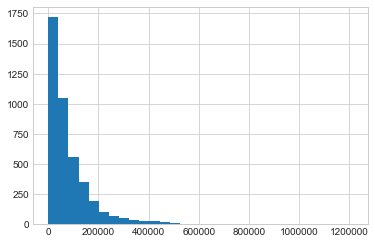

In [15]:
plt.hist(df_test['abs_error'], bins=30)
plt.show()

In [16]:
df_error = df_test[df_test['abs_error']>500000]
df_error

,bedrooms,bathrooms,grade,condition,waterfront,sqft_living15,sqft_lot15,98001,98002,98003,...,98166,98168,98177,98178,98188,98198,98199,price,prediction,abs_error
3379,3,4.00,9,3,0,1620,1855,0,0,0,...,0,0,0,0,0,0,0,458000.0,1.015625e+06,5.576250e+05
18315,3,2.25,8,5,0,2340,9600,0,0,0,...,0,0,0,0,0,0,0,648752.0,1.167350e+06,5.185980e+05
4502,4,3.75,9,3,0,4780,18480,0,0,0,...,0,0,0,0,0,0,0,2500000.0,1.757900e+06,7.421000e+05
17154,5,4.25,9,3,0,2540,12131,0,0,0,...,0,0,0,0,0,0,0,1000000.0,1.611800e+06,6.118000e+05
7726,4,3.75,10,4,0,3760,7653,0,0,0,...,0,0,0,0,0,0,0,1715000.0,2.235500e+06,5.205000e+05
20423,4,2.75,9,4,0,2600,11195,0,0,0,...,0,0,0,0,0,0,0,1650000.0,9.560980e+05,6.939020e+05
18057,6,4.25,11,3,0,3270,6334,0,0,0,...,0,0,0,0,0,0,0,1125000.0,1.926300e+06,8.013000e+05
12379,4,3.50,11,3,0,3930,13515,0,0,0,...,0,0,0,0,0,0,0,1691000.0,2.528550e+06,8.375500e+05
8811,5,5.25,12,3,0,3830,22605,0,0,0,...,0,0,0,0,0,0,0,3100000.0,2.204675e+06,8.953250e+05
6607,4,2.50,10,3,0,2830,13732,0,0,0,...,0,0,0,0,0,0,0,782000.0,1.681725e+06,8.997250e+05


In [17]:
df_error.describe()

,bedrooms,bathrooms,grade,condition,waterfront,sqft_living15,sqft_lot15,98001,98002,98003,...,98166,98168,98177,98178,98188,98198,98199,price,prediction,abs_error
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.0,37.0,37.0,...,37.0,37.0,37.0,37.0,37.0,37.000000,37.000000,3.700000e+01,3.700000e+01,3.700000e+01
mean,3.837838,3.175676,9.378378,3.513514,0.081081,3019.189189,12648.297297,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.027027,0.027027,1.670369e+06,1.458800e+06,7.268483e+05
std,0.897946,1.040608,1.138990,0.768173,0.276725,720.460418,8491.291846,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.164399,0.164399,7.565099e+05,5.546868e+05,1.701466e+05
min,2.000000,1.500000,8.000000,3.000000,0.000000,1280.000000,1855.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,4.580000e+05,5.490000e+05,5.060080e+05
25%,3.000000,2.500000,9.000000,3.000000,0.000000,2550.000000,7200.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.225000e+06,1.015625e+06,5.998041e+05
50%,4.000000,3.000000,9.000000,3.000000,0.000000,3030.000000,9600.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.650000e+06,1.519300e+06,7.088400e+05
75%,4.000000,3.750000,10.000000,4.000000,0.000000,3430.000000,15996.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,2.000000e+06,1.775300e+06,8.226790e+05
max,6.000000,5.500000,12.000000,5.000000,1.000000,4780.000000,36563.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,4.000000e+06,2.787060e+06,1.212940e+06


In [18]:
df_error.corr()['abs_error'].dropna().sort_values()

condition       -0.379146
98102           -0.219307
98144           -0.201990
98105           -0.168049
98199           -0.156447
98112           -0.147377
98119           -0.114447
98033           -0.017883
98109            0.000750
98075            0.021064
98198            0.023289
98004            0.101173
98040            0.186610
bedrooms         0.211700
bathrooms        0.223628
waterfront       0.223871
98039            0.300378
sqft_living15    0.303820
prediction       0.368074
grade            0.398675
sqft_lot15       0.415124
price            0.602575
abs_error        1.000000
Name: abs_error, dtype: float64

In [19]:
len(df_test[df_test[98004]==1])

58

In [20]:
df[df['zipcode']==98004][['mean_income', 'median_income']]

,mean_income,median_income
77,144248.0,99669.0
101,144248.0,99669.0
106,144248.0,99669.0
399,144248.0,99669.0
452,144248.0,99669.0
458,144248.0,99669.0
460,144248.0,99669.0
472,144248.0,99669.0
484,144248.0,99669.0
523,144248.0,99669.0


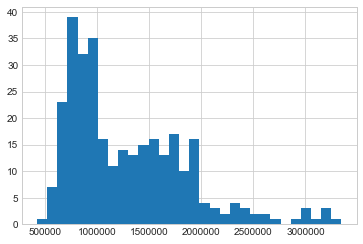

In [21]:
plt.hist(df[df['zipcode']==98004]['price'], bins=30)
plt.show()

# Cross Validation

In [22]:
# models = [
#     ('LinearRegression', LinearRegression()),
#     ('RandomForestRegressor10', RandomForestRegressor(n_estimators=10)),
#     ('RandomForestRegressor100', RandomForestRegressor(n_estimators=100, n_jobs=4)),
#     ('KNeighborsRegressor', KNeighborsRegressor()),
#     ('DecisionTreeRegressor', DecisionTreeRegressor())
# ]

# k = 10
# results = {}
# for m in models:
#     print('MODEL', m[0])
#     results[m[0]] = {'mae':[], 'rmse':[]}
#     kf = KFold(n_splits=k)
#     for train_index, test_index in kf.split(X):
#         X_train_k, X_test_k = X.values[train_index], X.values[test_index]
#         y_train_k, y_test_k = y.values[train_index], y.values[test_index]
#         model = m[1]
#         model.fit(X_train_k, y_train_k.ravel())
#         y_pred = model.predict(X_test_k)
#         mae = mean_absolute_error(y_test_k, y_pred)
#         rmse = np.sqrt(mean_squared_error(y_test_k, y_pred))
#         results[m[0]]['mae'].append(mae)
#         results[m[0]]['rmse'].append(rmse)

In [23]:
# for metric in ['mae', 'rmse']:
#     values = []
#     labels = []
#     for model, result_values in results.items():
#         for m, v in result_values.items():
#             if m == metric:
#                 labels.append(model)
#                 values.append(v)
#     plt.figure(figsize=(12,6))
#     plt.title(metric)
#     plt.boxplot(values)
#     plt.xticks(range(1, len(labels)+1), labels, rotation='horizontal')
#     plt.show()